In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset

In [233]:
wh15 = pd.read_csv('2015.csv')
wh16 = pd.read_csv('2016.csv')
wh17 = pd.read_csv('2017.csv')
wh18 = pd.read_csv('2018.csv')
wh19 = pd.read_csv('2019.csv')

#### Cleaning and Merging of data from each year
We have the happiness score data of 5 years (2015 - 2019). I will be cleaning and merging all 5 for better analysis. 

First I'll investigate the columns for each year, ensuring that they are all consistent, drop redundant columns, include a new column for the year and finally merge the dataset for analysis.

### 2015 Year Overview

In [234]:
wh15.sample(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
100,Swaziland,Sub-Saharan Africa,101,4.867,0.08742,0.71206,1.07284,0.07566,0.30658,0.03060,0.18259,2.48676
53,Kazakhstan,Central and Eastern Europe,54,5.855,0.04114,1.12254,1.12241,0.64368,0.51649,0.08454,0.11827,2.24729
16,Luxembourg,Western Europe,17,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
34,Saudi Arabia,Middle East and Northern Africa,35,6.411,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872
52,Paraguay,Latin America and Caribbean,53,5.878,0.04563,0.75985,1.30477,0.66098,0.53899,0.08242,0.34240,2.18896
13,Mexico,Latin America and Caribbean,14,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214
41,El Salvador,Latin America and Caribbean,42,6.130,0.05618,0.76454,1.02507,0.67737,0.40350,0.11776,0.10692,3.03500
135,Yemen,Middle East and Northern Africa,136,4.077,0.04367,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,1.92313
105,Tajikistan,Central and Eastern Europe,106,4.786,0.03198,0.39047,0.85563,0.57379,0.47216,0.15072,0.22974,2.11399


In [235]:
wh15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [236]:
wh15.shape

(158, 12)

In [237]:
wh15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

I will rename some columns for ease identification and make sure the columns in subsequent years are the same 
I will add a new column for year and filter redundant colunms (Standard error, Dystopia residual)

In [238]:
wh15.rename(columns = {'Family': 'Social support',
                       'Freedom': 'Freedom to make life choices',
                        'Trust (Government Corruption)': 'Perceptions of corruption'
                          }, inplace = True)

In [239]:
wh15_new = wh15.filter(['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)','Social support',
                        'Health (Life Expectancy)', 'Freedom to make life choices', 'Perceptions of corruption','Generosity', 
                         ])

In [240]:
wh15_new.insert(0, "Year", 2015)

In [241]:
wh15_new.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption,Generosity
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [242]:
wh15_new.shape

(158, 11)

### 2016 Year Overview

In [243]:
wh16.sample(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
21,Singapore,Southeastern Asia,22,6.739,6.674,6.804,1.64555,0.86758,0.94719,0.48770,0.46987,0.32706,1.99375
124,Congo (Kinshasa),Sub-Saharan Africa,125,4.272,4.191,4.353,0.05661,0.80676,0.18800,0.15602,0.06075,0.25458,2.74924
147,Madagascar,Sub-Saharan Africa,148,3.695,3.621,3.769,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
130,Zimbabwe,Sub-Saharan Africa,131,4.193,4.101,4.285,0.35041,0.71478,0.15950,0.25429,0.08582,0.18503,2.44270
29,Malta,Western Europe,30,6.488,6.409,6.567,1.30782,1.09879,0.80315,0.54994,0.17554,0.56237,1.99032
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
142,South Sudan,Sub-Saharan Africa,143,3.832,3.596,4.068,0.39394,0.18519,0.15781,0.19662,0.13015,0.25899,2.50929
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
27,United Arab Emirates,Middle East and Northern Africa,28,6.573,6.494,6.652,1.57352,0.87114,0.72993,0.56215,0.35561,0.26591,2.21507
17,Belgium,Western Europe,18,6.929,6.861,6.997,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,2.61355


In [244]:
wh16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [245]:
wh16.shape

(157, 13)

In [246]:
wh16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

#### Renaming, filtering and adding a new column

In [247]:
wh16.rename(columns = {'Family': 'Social support',
                       'Freedom': 'Freedom to make life choices',
                        'Trust (Government Corruption)': 'Perceptions of corruption'
                          }, inplace = True)

In [248]:
wh16_new = wh16.filter(['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)','Social support',
                        'Health (Life Expectancy)', 'Freedom to make life choices', 'Perceptions of corruption','Generosity', 
                         ])

In [249]:
wh16_new.insert(0, "Year", 2016)

In [250]:
wh16_new.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption,Generosity
0,2016,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,2016,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,2016,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,2016,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,2016,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [251]:
wh16_new.shape

(157, 11)

### 2017 Year Overview

In [252]:
wh17.sample(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
114,Senegal,115,4.535,4.601604,4.468396,0.479309,1.179692,0.409363,0.377922,0.183469,0.115460,1.789646
75,Jamaica,76,5.311,5.581399,5.040601,0.925579,1.368218,0.641022,0.474307,0.233818,0.055268,1.612326
62,Peru,63,5.715,5.811947,5.618054,1.035225,1.218770,0.630166,0.450003,0.126820,0.047049,2.207269
57,Bolivia,58,5.823,5.903977,5.742023,0.833757,1.227619,0.473630,0.558733,0.225561,0.060478,2.443279
92,Somalia,93,5.151,5.242484,5.059516,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485
136,Chad,137,3.936,4.034712,3.837289,0.438013,0.953856,0.041135,0.162342,0.216114,0.053582,2.071238
121,India,122,4.315,4.371522,4.258478,0.792221,0.754373,0.455428,0.469987,0.231538,0.092227,1.519117
66,Belarus,67,5.569,5.646114,5.491885,1.156558,1.444945,0.637714,0.295400,0.155138,0.156314,1.723233
122,Mauritania,123,4.292,4.377164,4.206836,0.648457,1.272031,0.285349,0.096098,0.201870,0.136957,1.651637
40,Bahrain,41,6.087,6.178989,5.995011,1.488412,1.323110,0.653133,0.536747,0.172668,0.257042,1.656149


In [253]:
wh17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [254]:
wh17.shape

(155, 12)

In [255]:
wh17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

#### Renaming, filtering and adding a new column

In [256]:
wh17.rename(columns = {'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score', 'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                       'Family': 'Social support', 'Health..Life.Expectancy.': 'Health (Life Expectancy)', 'Freedom': 'Freedom to make life choices',
                       'Trust..Government.Corruption.': 'Perceptions of corruption'
                          }, inplace = True)

In [257]:
wh17_new = wh17.filter(['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)','Social support',
                        'Health (Life Expectancy)', 'Freedom to make life choices', 'Perceptions of corruption','Generosity', 
                         ])

In [258]:
wh17_new.insert(0, "Year", 2017)

In [259]:
wh17_new.head()

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption,Generosity
0,2017,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,2017,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,2017,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,2017,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,2017,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [260]:
wh17.shape

(155, 12)

### 2018 Year Overview

In [261]:
wh18.sample(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
129,130,Myanmar,4.308,0.682,1.174,0.429,0.580,0.598,0.178
43,44,Uzbekistan,6.096,0.719,1.584,0.605,0.724,0.328,0.259
21,22,Malta,6.627,1.270,1.525,0.884,0.645,0.376,0.142
30,31,Uruguay,6.379,1.093,1.459,0.771,0.625,0.130,0.155
136,137,Sudan,4.139,0.605,1.240,0.312,0.016,0.134,0.082
134,135,Uganda,4.161,0.322,1.090,0.237,0.450,0.259,0.061
72,73,Belarus,5.483,1.039,1.498,0.700,0.307,0.101,0.154
139,140,Guinea,3.964,0.344,0.792,0.211,0.394,0.185,0.094
26,27,Panama,6.430,1.112,1.438,0.759,0.597,0.125,0.063


In [262]:
wh18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [263]:
wh18.shape

(156, 9)

In [264]:
wh18.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

#### Renaming, filtering and adding a new column

In [265]:
wh18.rename(columns = {'Overall rank': 'Happiness Rank', 'Country or region': 'Country', 'Score': 'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)',
                       'Healthy life expectancy': 'Health (Life Expectancy)'}, inplace = True)

In [266]:
wh18_new = wh18.filter(['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)','Social support',
                        'Health (Life Expectancy)', 'Freedom to make life choices', 'Perceptions of corruption','Generosity', 
                         ])

In [267]:
wh18_new.insert(0, "Year", 2018)

In [268]:
wh18_new.head()

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption,Generosity
0,2018,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,2018,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,2018,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,2018,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,2018,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256


In [269]:
wh18_new.shape

(156, 10)

### 2019 Year Overview

In [270]:
wh19.sample(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085
76,77,Dominican Republic,5.425,1.015,1.401,0.779,0.497,0.113,0.101
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
122,123,Mozambique,4.466,0.204,0.986,0.390,0.494,0.197,0.138
32,33,Uruguay,6.293,1.124,1.465,0.891,0.523,0.127,0.150
10,11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290
108,109,Cambodia,4.700,0.574,1.122,0.637,0.609,0.232,0.062
64,65,Peru,5.697,0.960,1.274,0.854,0.455,0.083,0.027
124,125,Bangladesh,4.456,0.562,0.928,0.723,0.527,0.166,0.143
62,63,Paraguay,5.743,0.855,1.475,0.777,0.514,0.184,0.080


In [271]:
wh19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [272]:
wh19.shape

(156, 9)

In [273]:
wh19.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

#### Renaming, filtering and adding a new column

In [274]:
wh19.rename(columns = {'Overall rank': 'Happiness Rank', 'Country or region': 'Country', 'Score': 'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)',
                       'Healthy life expectancy': 'Health (Life Expectancy)'}, inplace = True)

In [275]:
wh19_new = wh19.filter(['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)','Social support',
                        'Health (Life Expectancy)', 'Freedom to make life choices', 'Perceptions of corruption','Generosity', 
                         ])

In [276]:
wh19_new.insert(0, "Year", 2019)

In [277]:
wh19_new.head()

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption,Generosity
0,2019,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,2019,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,2019,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,2019,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,2019,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322


In [278]:
wh19_new.shape

(156, 10)

## Merging the data

In [279]:
print('Year 2015 has {} rows and {} columns'.format(wh15_new.shape[0], wh15_new.shape[1]))
print('Year 2016 has {} rows and {} columns'.format(wh16_new.shape[0], wh16_new.shape[1]))
print('Year 2017 has {} rows and {} columns'.format(wh17_new.shape[0], wh17_new.shape[1]))
print('Year 2018 has {} rows and {} columns'.format(wh18_new.shape[0], wh18_new.shape[1]))
print('Year 2019 has {} rows and {} columns'.format(wh19_new.shape[0], wh19_new.shape[1]))

Year 2015 has 158 rows and 11 columns
Year 2016 has 157 rows and 11 columns
Year 2017 has 155 rows and 10 columns
Year 2018 has 156 rows and 10 columns
Year 2019 has 156 rows and 10 columns


#### Here comes the tricky part.
2015 and 2016 has 11 columns while the other years has 10 columns. The missing column in 2017-2019 is the region column. 
I will merge the 2017-2019 database with that of 2015 and 2016 on the Country column both on the left and on the right in an inner joining.
This inner join will give just the intersection of the two databases thereby giving an equal number of rows, ie, the same number of countries in all the databases.

The resultant database will have redundant columns that will de removed using the drop() function.

In [280]:
#Note: Run this cell once!

wh17_new = wh17_new.merge(wh16_new, left_on = 'Country', right_on = 'Country', how = 'inner')
wh18_new = wh18_new.merge(wh16_new, left_on = 'Country', right_on = 'Country', how = 'inner')
wh19_new = wh19_new.merge(wh15_new, left_on = 'Country', right_on = 'Country', how = 'inner')

In [281]:
print (wh15_new.columns)
print (wh16_new.columns)
print (wh17_new.columns)
print (wh18_new.columns)
print (wh19_new.columns)

Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom to make life choices',
       'Perceptions of corruption', 'Generosity'],
      dtype='object')
Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom to make life choices',
       'Perceptions of corruption', 'Generosity'],
      dtype='object')
Index(['Year_x', 'Country', 'Happiness Rank_x', 'Happiness Score_x',
       'Economy (GDP per Capita)_x', 'Social support_x',
       'Health (Life Expectancy)_x', 'Freedom to make life choices_x',
       'Perceptions of corruption_x', 'Generosity_x', 'Year_y', 'Region',
       'Happiness Rank_y', 'Happiness Score_y', 'Economy (GDP per Capita)_y',
       'Social support_y', 'Health (Life Expectancy)_y',
       'Freedom to make life choices_y', 'Perceptions of corru

##### We see that 2015 and 2016 columns remain the same whereas more columns were added to the 2017-2019 columns. These would be dropped and the remaining ones would be renamed to be identical with the 2015 and 2016 columns.

##### At this point I believe a function or a for loop can do this which I would try later.

In [282]:
wh17_new.drop(columns = ['Year_y', 'Happiness Rank_y', 'Happiness Score_y', 'Economy (GDP per Capita)_y',
       'Social support_y', 'Health (Life Expectancy)_y', 'Freedom to make life choices_y',
       'Perceptions of corruption_y', 'Generosity_y'], inplace = True)

In [283]:
wh18_new.drop(columns = ['Year_y', 'Happiness Rank_y', 'Happiness Score_y', 'Economy (GDP per Capita)_y',
       'Social support_y', 'Health (Life Expectancy)_y', 'Freedom to make life choices_y',
       'Perceptions of corruption_y', 'Generosity_y'], inplace = True)

In [284]:
wh19_new.drop(columns = ['Year_y', 'Happiness Rank_y', 'Happiness Score_y', 'Economy (GDP per Capita)_y',
       'Social support_y', 'Health (Life Expectancy)_y', 'Freedom to make life choices_y',
       'Perceptions of corruption_y', 'Generosity_y'], inplace = True)

#### Renaming the remaining columns 

In [285]:
wh17_new.columns

Index(['Year_x', 'Country', 'Happiness Rank_x', 'Happiness Score_x',
       'Economy (GDP per Capita)_x', 'Social support_x',
       'Health (Life Expectancy)_x', 'Freedom to make life choices_x',
       'Perceptions of corruption_x', 'Generosity_x', 'Region'],
      dtype='object')

In [286]:
wh17_new.rename(columns = {'Year_x': 'Year', 'Happiness Rank_x': 'Happiness Rank', 'Happiness Score_x': 'Happiness Score', 
                           'Economy (GDP per Capita)_x': 'Economy (GDP per Capita)', 'Social support_x': 'Social support',
                       'Health (Life Expectancy)_x': 'Health (Life Expectancy)', 'Freedom to make life choices_x': 'Freedom to make life choices',
                         'Perceptions of corruption_x': 'Perceptions of corruption', 'Generosity_x': 'Generosity' }, inplace = True)

wh17_new = wh17_new.filter(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                            'Social support', 'Health (Life Expectancy)', 'Freedom to make life choices', 
                            'Perceptions of corruption','Generosity'])


In [287]:
wh18_new.rename(columns = {'Year_x': 'Year', 'Happiness Rank_x': 'Happiness Rank', 'Happiness Score_x': 'Happiness Score', 
                           'Economy (GDP per Capita)_x': 'Economy (GDP per Capita)', 'Social support_x': 'Social support',
                       'Health (Life Expectancy)_x': 'Health (Life Expectancy)', 'Freedom to make life choices_x': 'Freedom to make life choices',
                         'Perceptions of corruption_x': 'Perceptions of corruption', 'Generosity_x': 'Generosity' }, inplace = True)

wh18_new = wh18_new.filter(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                            'Social support', 'Health (Life Expectancy)', 'Freedom to make life choices', 
                            'Perceptions of corruption','Generosity'])

In [288]:
wh19_new.rename(columns = {'Year_x': 'Year', 'Happiness Rank_x': 'Happiness Rank', 'Happiness Score_x': 'Happiness Score', 
                           'Economy (GDP per Capita)_x': 'Economy (GDP per Capita)', 'Social support_x': 'Social support',
                       'Health (Life Expectancy)_x': 'Health (Life Expectancy)', 'Freedom to make life choices_x': 'Freedom to make life choices',
                         'Perceptions of corruption_x': 'Perceptions of corruption', 'Generosity_x': 'Generosity' }, inplace = True)

wh19_new = wh19_new.filter(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                            'Social support', 'Health (Life Expectancy)', 'Freedom to make life choices', 
                            'Perceptions of corruption','Generosity'])

In [289]:
print (wh15_new.columns)
print (wh16_new.columns)
print (wh17_new.columns)
print (wh18_new.columns)
print (wh19_new.columns)

Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom to make life choices',
       'Perceptions of corruption', 'Generosity'],
      dtype='object')
Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom to make life choices',
       'Perceptions of corruption', 'Generosity'],
      dtype='object')
Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom to make life choices',
       'Perceptions of corruption', 'Generosity'],
      dtype='object')
Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom to make life choices',
       'P

##### Finally, all columns are similar. Next is to create a database containing all the years

In [290]:
wh_final = pd.concat([wh15_new, wh16_new, wh17_new, wh18_new, wh19_new], 
                     sort = False, ignore_index=True)
wh_final.sample(10)

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption,Generosity
759,2019,Malawi,Sub-Saharan Africa,150,3.410,0.191000,0.560000,0.495000,0.443000,0.089000,0.218000
425,2017,Myanmar,Southeastern Asia,114,4.545,0.367111,1.123236,0.397523,0.514492,0.188816,0.838075
47,2015,Ecuador,Latin America and Caribbean,48,5.975,0.864020,0.999030,0.790750,0.485740,0.180900,0.115410
232,2016,Hong Kong,Eastern Asia,75,5.458,1.510700,0.870210,0.952770,0.480790,0.316470,0.400970
261,2016,Honduras,Latin America and Caribbean,104,4.871,0.694290,0.755960,0.583830,0.267550,0.069060,0.204400
218,2016,Belarus,Central and Eastern Europe,61,5.802,1.130620,1.049930,0.631040,0.290910,0.174570,0.139420
383,2017,Paraguay,Latin America and Caribbean,70,5.493,0.932537,1.507285,0.579251,0.473508,0.091066,0.224151
318,2017,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
751,2019,Comoros,Sub-Saharan Africa,142,3.973,0.274000,0.757000,0.505000,0.142000,0.078000,0.275000
633,2019,Belgium,Western Europe,18,6.923,1.356000,1.504000,0.986000,0.473000,0.210000,0.160000


In [291]:
wh_final.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption,Generosity
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,764.000000,765.000000
mean,2016.968627,78.206536,5.393793,0.920905,1.080035,0.616014,0.411172,0.125622,0.218690
std,1.417563,45.127298,1.122498,0.402757,0.326332,0.244228,0.153349,0.106305,0.123212
min,2015.000000,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,39.000000,4.513000,0.620000,0.869080,0.449000,0.309410,0.054000,0.129762
50%,2017.000000,78.000000,5.332000,0.985000,1.123236,0.649547,0.431660,0.090405,0.201964
75%,2018.000000,117.000000,6.199000,1.238000,1.330000,0.808000,0.531311,0.155313,0.279920
max,2019.000000,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


In [292]:
wh_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          765 non-null    int64  
 1   Country                       765 non-null    object 
 2   Region                        765 non-null    object 
 3   Happiness Rank                765 non-null    int64  
 4   Happiness Score               765 non-null    float64
 5   Economy (GDP per Capita)      765 non-null    float64
 6   Social support                765 non-null    float64
 7   Health (Life Expectancy)      765 non-null    float64
 8   Freedom to make life choices  765 non-null    float64
 9   Perceptions of corruption     764 non-null    float64
 10  Generosity                    765 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 65.9+ KB


In [293]:
wh_final.isna().sum()

Year                            0
Country                         0
Region                          0
Happiness Rank                  0
Happiness Score                 0
Economy (GDP per Capita)        0
Social support                  0
Health (Life Expectancy)        0
Freedom to make life choices    0
Perceptions of corruption       1
Generosity                      0
dtype: int64

##### Perception of coruption has a mising row. Let's figure out what country that is and get the mean value for all the years to replace the missing value

In [294]:
wh_final[wh_final['Perceptions of corruption'].isna()]

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption,Generosity
484,2018,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186


UAE 2018 has the missing value. I'll take the mean of the other years and replace the null value

In [295]:
wh_UAE = wh_final[wh_final['Country'] == 'United Arab Emirates']
wh_UAE

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Perceptions of corruption,Generosity
19,2015,United Arab Emirates,Middle East and Northern Africa,20,6.901,1.427270,1.12575,0.809250,0.641570,0.38583,0.264280
185,2016,United Arab Emirates,Middle East and Northern Africa,28,6.573,1.573520,0.87114,0.729930,0.562150,0.35561,0.265910
335,2017,United Arab Emirates,Middle East and Northern Africa,21,6.648,1.626343,1.26641,0.726798,0.608345,0.32449,0.360942
484,2018,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096000,0.77600,0.670000,0.284000,NaN,0.186000
636,2019,United Arab Emirates,Middle East and Northern Africa,21,6.825,1.503000,1.31000,0.825000,0.598000,0.18200,0.262000


In [296]:
wh_UAE['Perceptions of corruption'].mean()

0.3119823909258842

In [297]:
wh_final.fillna(0.311982, inplace=True)

In [298]:
wh_final.isna().sum()

Year                            0
Country                         0
Region                          0
Happiness Rank                  0
Happiness Score                 0
Economy (GDP per Capita)        0
Social support                  0
Health (Life Expectancy)        0
Freedom to make life choices    0
Perceptions of corruption       0
Generosity                      0
dtype: int64

### That's the end of data wrangling/cleaning. On to Exploratory analysis

## 1. Trend of Happiest countries over the years

In [299]:
gp = wh_final.groupby(['Year', 'Happiness Score'])['Country'].max().reset_index()
gp

,Year,Happiness Score,Country
0,2015,2.839,Togo
1,2015,2.905,Burundi
2,2015,3.006,Syria
3,2015,3.340,Benin
4,2015,3.465,Rwanda
...,...,...,...
749,2019,7.488,Netherlands
750,2019,7.494,Iceland
751,2019,7.554,Norway
752,2019,7.600,Denmark


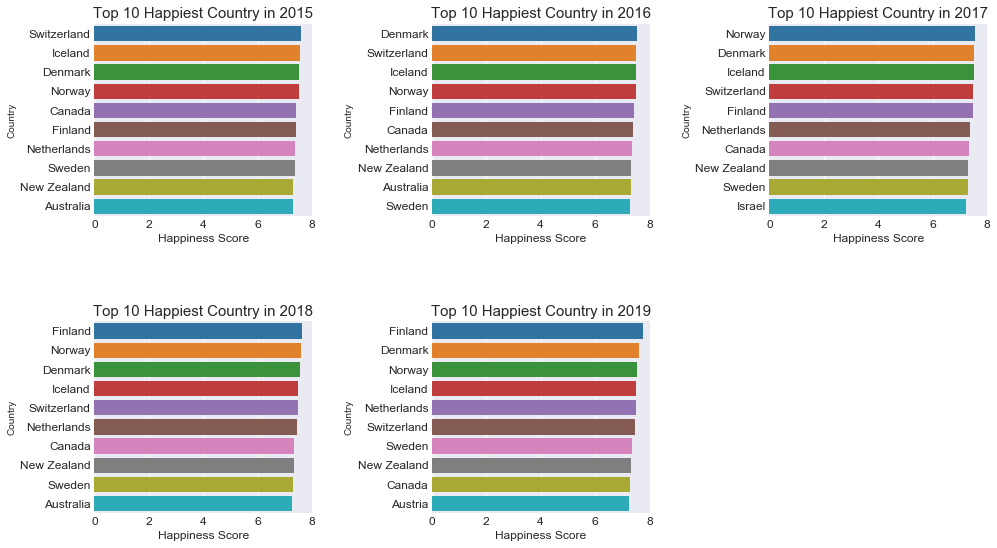

In [300]:
gp_15 = gp.loc[gp.Year == 2015, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[:10]
gp_16 = gp.loc[gp.Year == 2016, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[:10]
gp_17 = gp.loc[gp.Year == 2017, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[:10]
gp_18 = gp.loc[gp.Year == 2018, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[:10]
gp_19 = gp.loc[gp.Year == 2019, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[:10]

plt.figure(figsize=(16,9))
plt.subplot(231)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gp_15)
plt.title('Top 10 Happiest Country in 2015', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(232)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gp_16)
plt.title('Top 10 Happiest Country in 2016', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(233)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gp_17)
plt.title('Top 10 Happiest Country in 2017', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(234)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gp_18)
plt.title('Top 10 Happiest Country in 2018', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)

plt.subplot(235)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gp_19)
plt.title('Top 10 Happiest Country in 2019', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)

plt.subplots_adjust(hspace=0.55,wspace=0.55)
plt.show()

## 2. Trend of Least Happy countries over the years

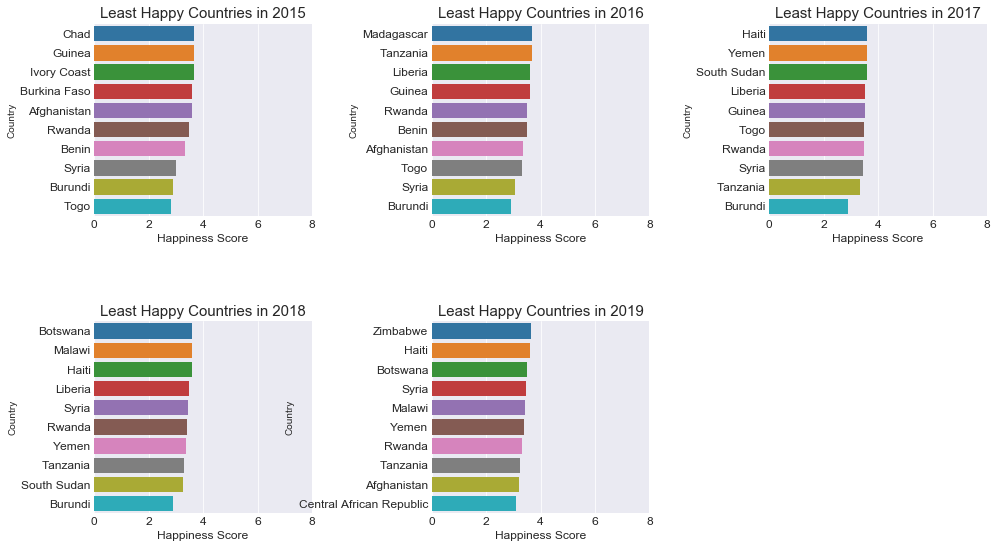

In [301]:
gps_15 = gp.loc[gp.Year == 2015, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[-10:]
gps_16 = gp.loc[gp.Year == 2016, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[-10:]
gps_17 = gp.loc[gp.Year == 2017, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[-10:]
gps_18 = gp.loc[gp.Year == 2018, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[-10:]
gps_19 = gp.loc[gp.Year == 2019, ['Happiness Score', 'Country']].sort_values(by = 'Happiness Score', ascending = False)[-10:]

plt.figure(figsize=(16,9))
plt.subplot(231)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gps_15)
plt.title('Least Happy Countries in 2015', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(232)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gps_16)
plt.title('Least Happy Countries in 2016', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(233)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gps_17)
plt.title('Least Happy Countries in 2017', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)


plt.subplot(234)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gps_18)
plt.title('Least Happy Countries in 2018', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)

plt.subplot(235)
sns.barplot(x = 'Happiness Score', y = 'Country', data = gps_19)
plt.title('Least Happy Countries in 2019', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)
plt.xlabel('Happiness Score',size = 12)

plt.subplots_adjust(hspace=0.55,wspace=0.55)
plt.show()

Next, using a histogram, I'll be comparing the distribution of happiness amongst the countries in coming years.

### Distribution of Happiness Score across 2015 and 2016

Text(0.5, 1.0, 'Distribution of Happiness scores across 2015 & 2016')

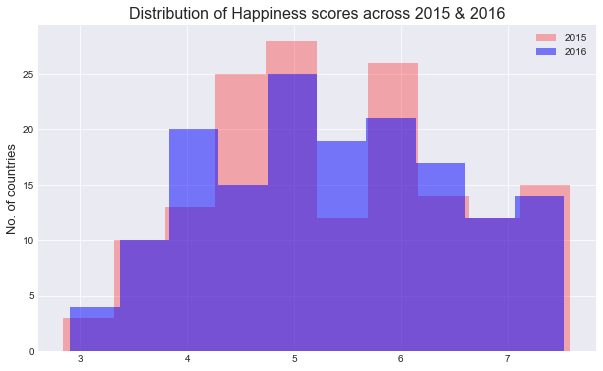

In [302]:
plt.figure(figsize=(10,6))
a=10
plt.hist(wh15_new['Happiness Score'],a,label='2015',alpha=0.3,color='red')
plt.hist(wh16_new['Happiness Score'],a,label='2016',alpha=0.5,color='blue')
plt.ylabel('No. of countries',size=13)
plt.legend(loc='upper right')
plt.title('Distribution of Happiness scores across 2015 & 2016',size=16)

As observed from the stacked histogram, more countries were happier in 2015 than in 2016. Countries having happiness score between 4 and 6 were fewer in 2016 in comparison to 2015. Different factors influences the happiness state of a country which we will explore in subsequent sections.

### Distribution of Happiness Score across 2016 and 2017

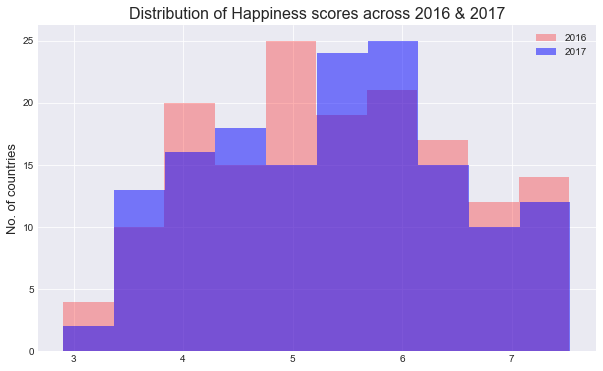

In [303]:
plt.figure(figsize=(10,6))
a=10
plt.hist(wh16_new['Happiness Score'],a,label='2016',alpha=0.3,color='red')
plt.hist(wh17_new['Happiness Score'],a,label='2017',alpha=0.5,color='blue')
plt.ylabel('No. of countries',size=13)
plt.legend(loc='upper right')
plt.title('Distribution of Happiness scores across 2016 & 2017',size=16)
plt.show()

In 2017, the happiest countries experienced a dip in their score when compared withh 2016 as seen in the histogram above. However, the very sad countries in 2016 improved in 2017. Also, there was an increase number of countries having happiness score between 5 and 6. In general, I will conclude that 2017 was a good year for previously sad countries but a bad year for previously happy countries. What could be the reason? Could it be that the sad countries had an increase in GDP, family support,etc while the reverse was the case in the happy countries? We will find out. worldwide, 2017 was a pretty good year because the difference in the happy countries were not much. We can safely conclude that the moderately happy countries became happier in 2017 and the living standards at the very happy countries fell to some extent.

### Distribution of Happiness Score across 2017 and 2018

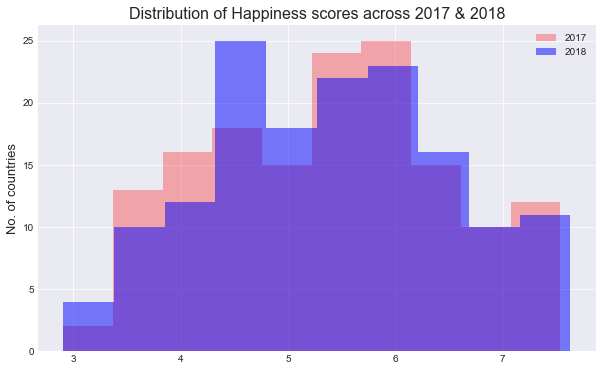

In [304]:
plt.figure(figsize=(10,6))
a=10
plt.hist(wh17_new['Happiness Score'],a,label='2017',alpha=0.3,color='red')
plt.hist(wh18_new['Happiness Score'],a,label='2018',alpha=0.5,color='blue')
plt.ylabel('No. of countries',size=13)
plt.legend(loc='upper right')
plt.title('Distribution of Happiness scores across 2017 & 2018',size=16)
plt.show()

In 2018, more countries fell below the average happiness score of 5.3. However, the hapiness score for the happy countries reached its maximum in 2018. 2018 was a relatively sad year.

### Distribution of Happiness Score across 2018 and 2019

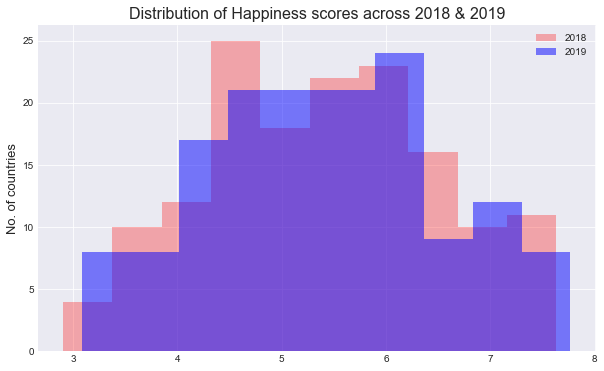

In [305]:
plt.figure(figsize=(10,6))
a=10
plt.hist(wh18_new['Happiness Score'],a,label='2018',alpha=0.3,color='red')
plt.hist(wh19_new['Happiness Score'],a,label='2019',alpha=0.5,color='blue')
plt.ylabel('No. of countries',size=13)
plt.legend(loc='upper right')
plt.title('Distribution of Happiness scores across 2018 & 2019',size=16)
plt.show()

2019 was a happier year than 2018. The extreme values tended to the right, that is the happines scores increased for the happy countries. Also, when compared with 2018, the happiness score of 2019 for the countries below average also improved. 

The stacked histogram plotted above shows that there has been an increase in the happines score at the extremums as there appears to be a shift to the right in the year 2019. A significant increase in the number of countries with score between 5-6 has been observed. This may signify relatively better living standards and satisfaction of the people with their lives and the government in 2019.

We can conclude that people have been happier in 2019 as compared to 2018.

### Correlating happiness score with the factors it depends on

In this section, I'll be checking the correlation between happiness score and factors such as GDP, family support, perception to corruption, life expectancy and freedom to make decisions across the years

### Correlation value for 2015 dataset

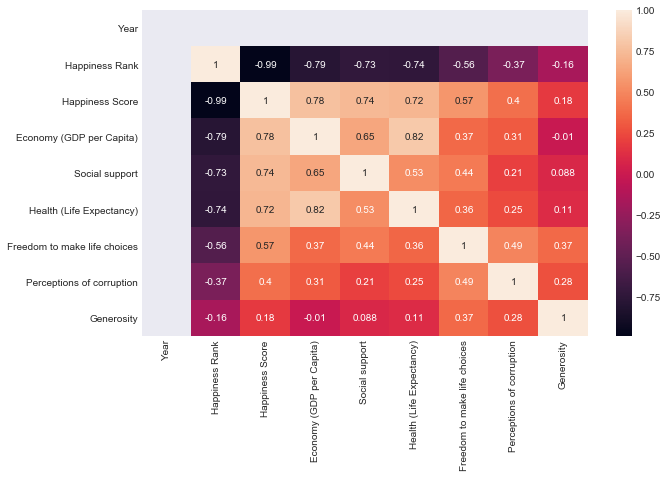

In [306]:
#creating a correlation matrix between numeric columns
c1=wh15_new.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(c1,annot=True)

### Correlation value for 2016

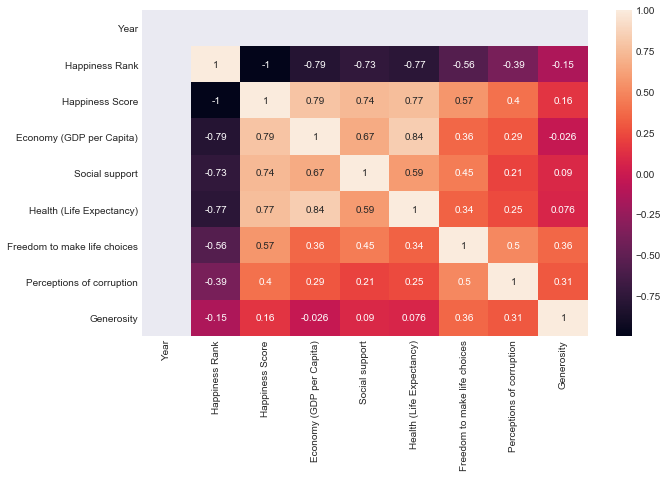

In [307]:
c2=wh16_new.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(c2,annot=True)

### Correlation value for 2017

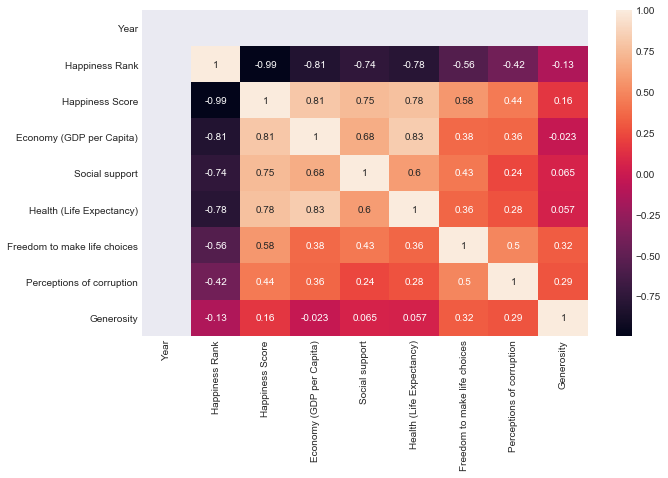

In [308]:
c3=wh17_new.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(c3,annot=True)

### Correlation value for 2018

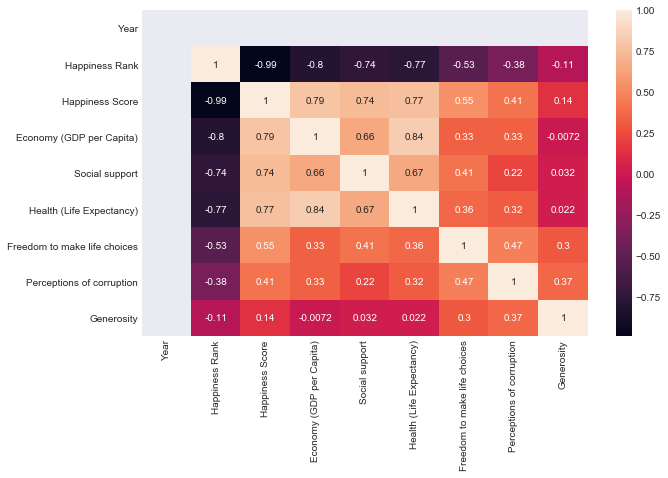

In [309]:
c4=wh18_new.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(c4,annot=True)

### Corelation value for 2019

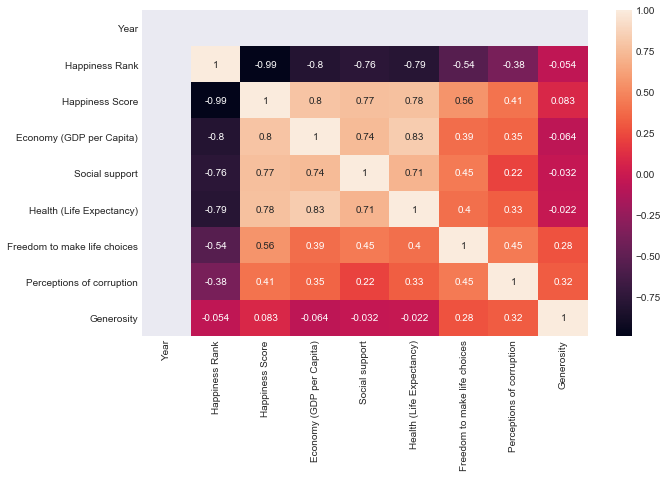

In [310]:
c5=wh19_new.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(c5,annot=True)

### correlation for all the years combined

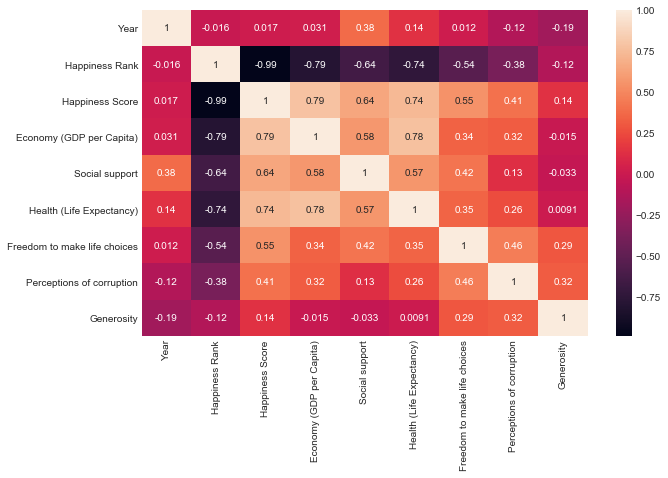

In [311]:
c_final=wh_final.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(c_final,annot=True)

### Using the top 10 happiest countries in 2019 and the least happy in the same year as the standard, I'll be analyzing the trend of GDP, etc over the years of these countries

## GDP performance of top 10 happiest countries over the years

In [312]:
data_2=[wh19_new['Country'], wh15_new['Economy (GDP per Capita)'], wh16_new['Economy (GDP per Capita)'], wh17_new['Economy (GDP per Capita)'],
       wh18_new['Economy (GDP per Capita)'], wh19_new['Economy (GDP per Capita)']]
headers_1=["Country","2015","2016","2017","2018","2019"]
gdp = pd.concat(data_2, axis=1, keys=headers_1, join='inner')
gdp.head(10)

,Country,2015,2016,2017,2018,2019
0,Finland,1.39651,1.44178,1.616463,1.305,1.340
1,Denmark,1.30232,1.52733,1.482383,1.456,1.383
2,Norway,1.32548,1.42666,1.480633,1.351,1.488
3,Iceland,1.45900,1.57744,1.564980,1.343,1.380
4,Netherlands,1.32629,1.40598,1.443572,1.420,1.396
5,Switzerland,1.29025,1.44015,1.503945,1.361,1.452
6,Sweden,1.32944,1.46468,1.479204,1.330,1.387
7,New Zealand,1.33171,1.36066,1.405706,1.268,1.303
8,Canada,1.25018,1.44443,1.494387,1.355,1.365
9,Austria,1.33358,1.45181,1.484415,1.340,1.376


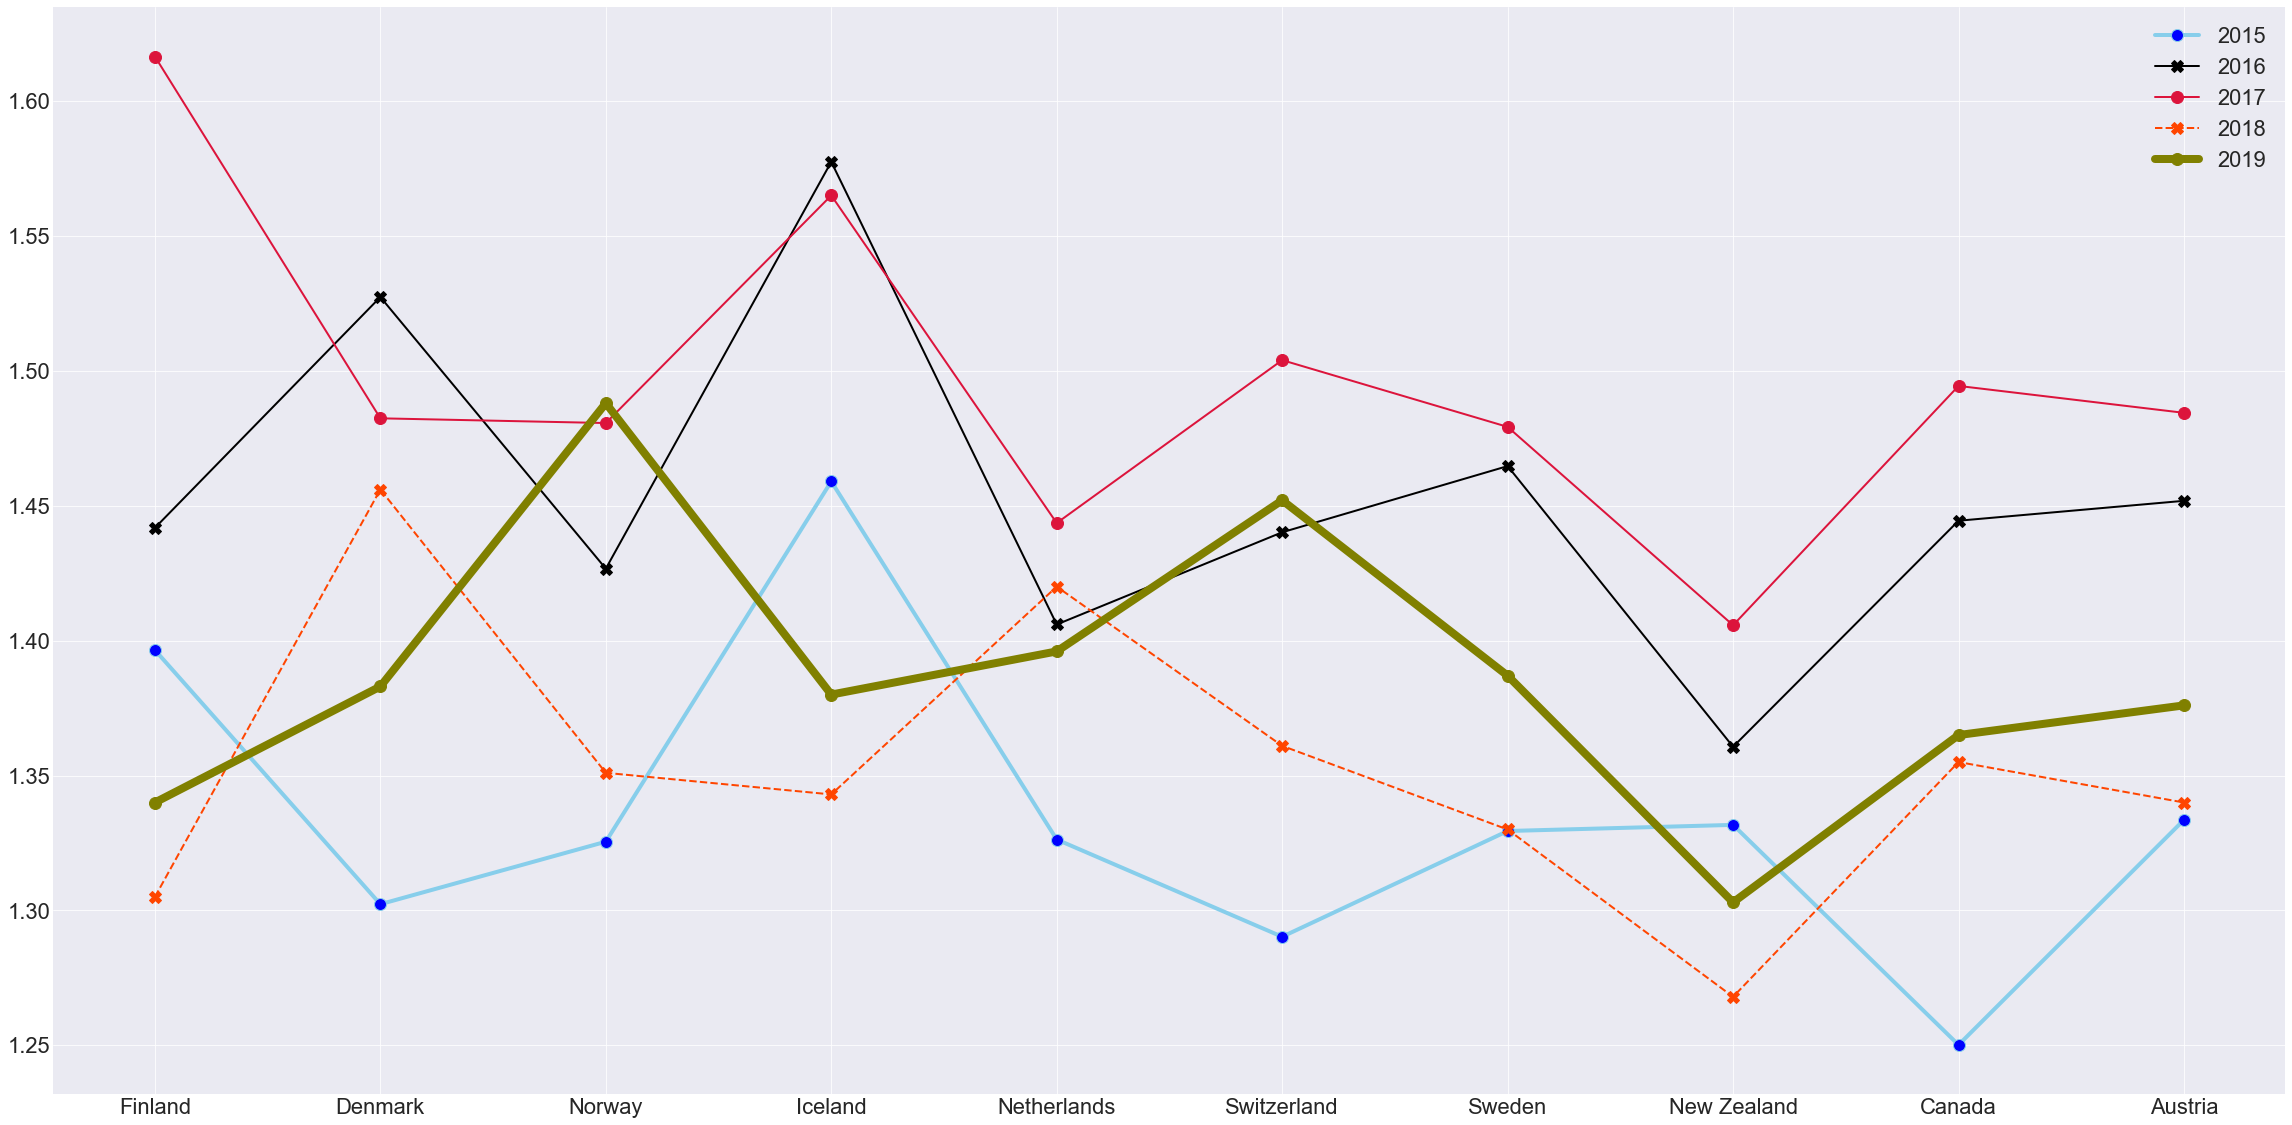

In [313]:
gdp_10=gdp.head(10)
plt.plot( 'Country', '2015', data=gdp_10, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Country', '2016', data=gdp_10, marker='X', color='black', markersize=12, linewidth=2)
plt.plot( 'Country', '2017', data=gdp_10, marker='o', color='crimson', markersize=12, linewidth=2, linestyle='solid', label="2017")
plt.plot( 'Country', '2018', data=gdp_10, marker='X', color='orangered', markersize=12, linewidth=2, linestyle='dashed', label="2018")
plt.plot( 'Country', '2019', data=gdp_10, marker='o', color='olive', markersize=12, linewidth=8, linestyle='solid', label="2019")
plt.legend(fontsize = 22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
fig = plt.gcf()
fig.set_size_inches(40,20)

## GDP performance of least 10 happy countries over the years

In [314]:
data_3=[wh19_new['Country'], wh15_new['Economy (GDP per Capita)'], wh16_new['Economy (GDP per Capita)'], wh17_new['Economy (GDP per Capita)'],
       wh18_new['Economy (GDP per Capita)'], wh19_new['Economy (GDP per Capita)']]
headers_1=["Country","2015","2016","2017","2018","2019"]
gdp = pd.concat(data_2, axis=1, keys=headers_1, join='inner')
gdp.tail(10)

,Country,2015,2016,2017,2018,2019
139,Zimbabwe,0.23906,0.55604,0.305809,0.357,0.366
140,Haiti,0.21102,0.84731,0.368610,0.332,0.323
141,Botswana,0.36498,0.13270,0.591683,1.017,1.041
142,Syria,1.06024,0.39394,0.397249,0.186,0.619
143,Malawi,0.06940,0.42214,0.119042,0.315,0.191
144,Yemen,0.46038,0.31995,0.244550,0.076,0.287
145,Rwanda,0.28520,0.34719,0.305445,0.689,0.359
146,Tanzania,0.20824,0.57939,0.368746,0.332,0.476
147,Afghanistan,0.07850,0.27954,0.777153,0.442,0.350
148,Central African Republic,0.34193,0.47155,0.511136,0.455,0.026


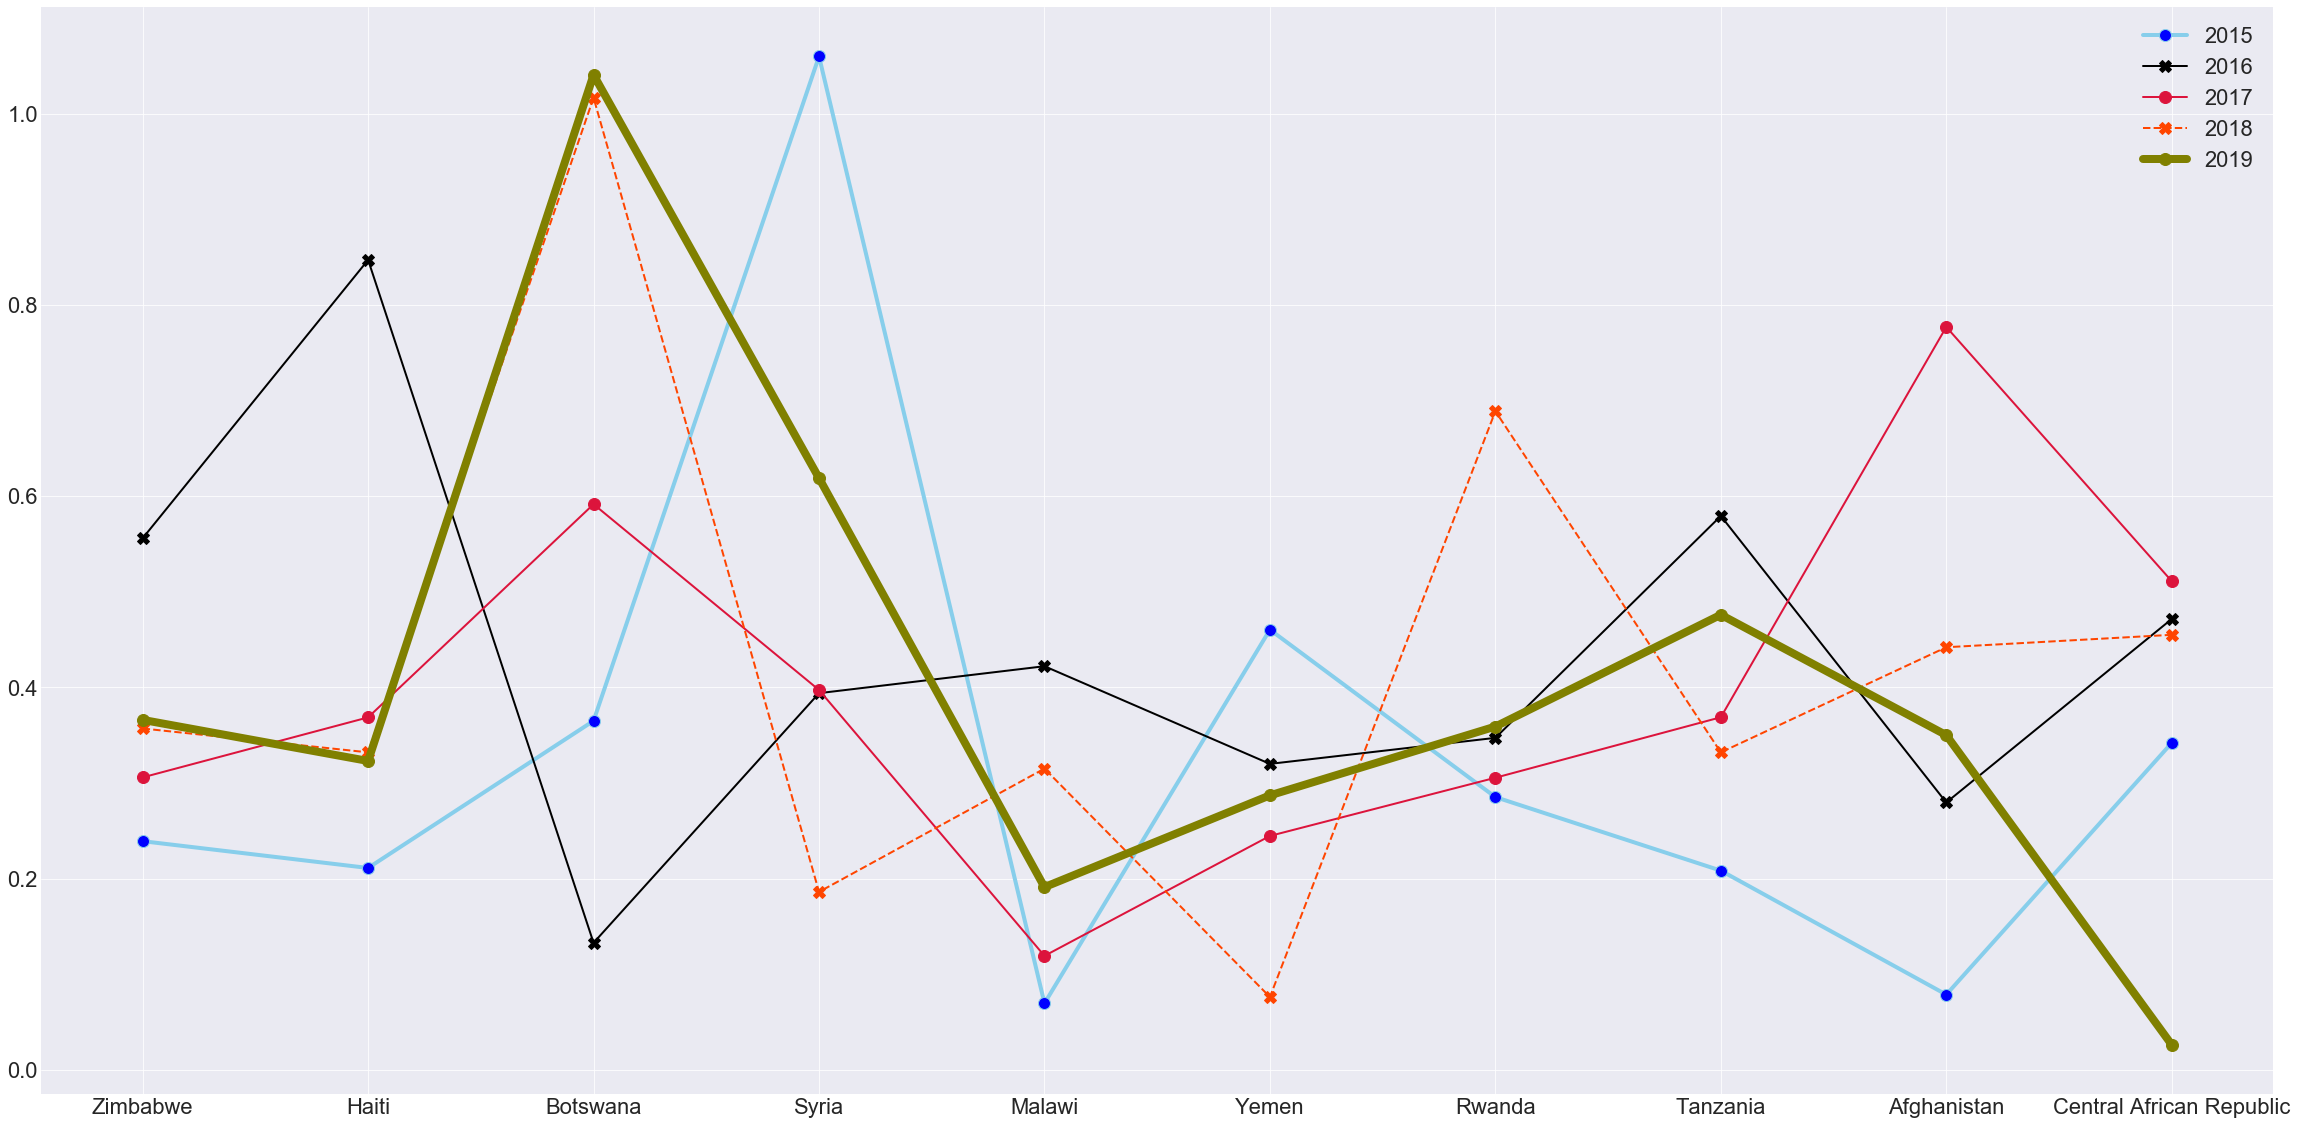

In [315]:
gdpleast_10=gdp.tail(10)
plt.plot( 'Country', '2015', data=gdpleast_10, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Country', '2016', data=gdpleast_10, marker='X', color='black', markersize=12, linewidth=2)
plt.plot( 'Country', '2017', data=gdpleast_10, marker='o', color='crimson', markersize=12, linewidth=2, linestyle='solid', label="2017")
plt.plot( 'Country', '2018', data=gdpleast_10, marker='X', color='orangered', markersize=12, linewidth=2, linestyle='dashed', label="2018")
plt.plot( 'Country', '2019', data=gdpleast_10, marker='o', color='olive', markersize=12, linewidth=8, linestyle='solid', label="2019")
plt.legend(fontsize = 22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
fig = plt.gcf()
fig.set_size_inches(40,20)

## Life expectancy rating of top 10 happiest countries over the years

In [316]:
data_4=[wh19_new['Country'], wh15_new['Health (Life Expectancy)'], wh16_new['Health (Life Expectancy)'], wh17_new['Health (Life Expectancy)'],
       wh18_new['Health (Life Expectancy)'], wh19_new['Health (Life Expectancy)']]
headers_1=["Country","2015","2016","2017","2018","2019"]
health = pd.concat(data_4, axis=1, keys=headers_1, join='inner')
health.head(10)


,Country,2015,2016,2017,2018,2019
0,Finland,0.94143,0.79504,0.796667,0.874,0.986
1,Denmark,0.94784,0.86303,0.792566,0.861,0.996
2,Norway,0.87464,0.86733,0.833552,0.868,1.028
3,Iceland,0.88521,0.79579,0.858131,0.914,1.026
4,Netherlands,0.90563,0.81091,0.809158,0.927,0.999
5,Switzerland,0.88911,0.82760,0.810696,0.878,1.052
6,Sweden,0.89284,0.81231,0.834558,0.896,1.009
7,New Zealand,0.91087,0.83096,0.816760,0.876,1.026
8,Canada,0.90837,0.85120,0.830875,0.913,1.039
9,Austria,0.93156,0.83121,0.843887,0.910,1.016


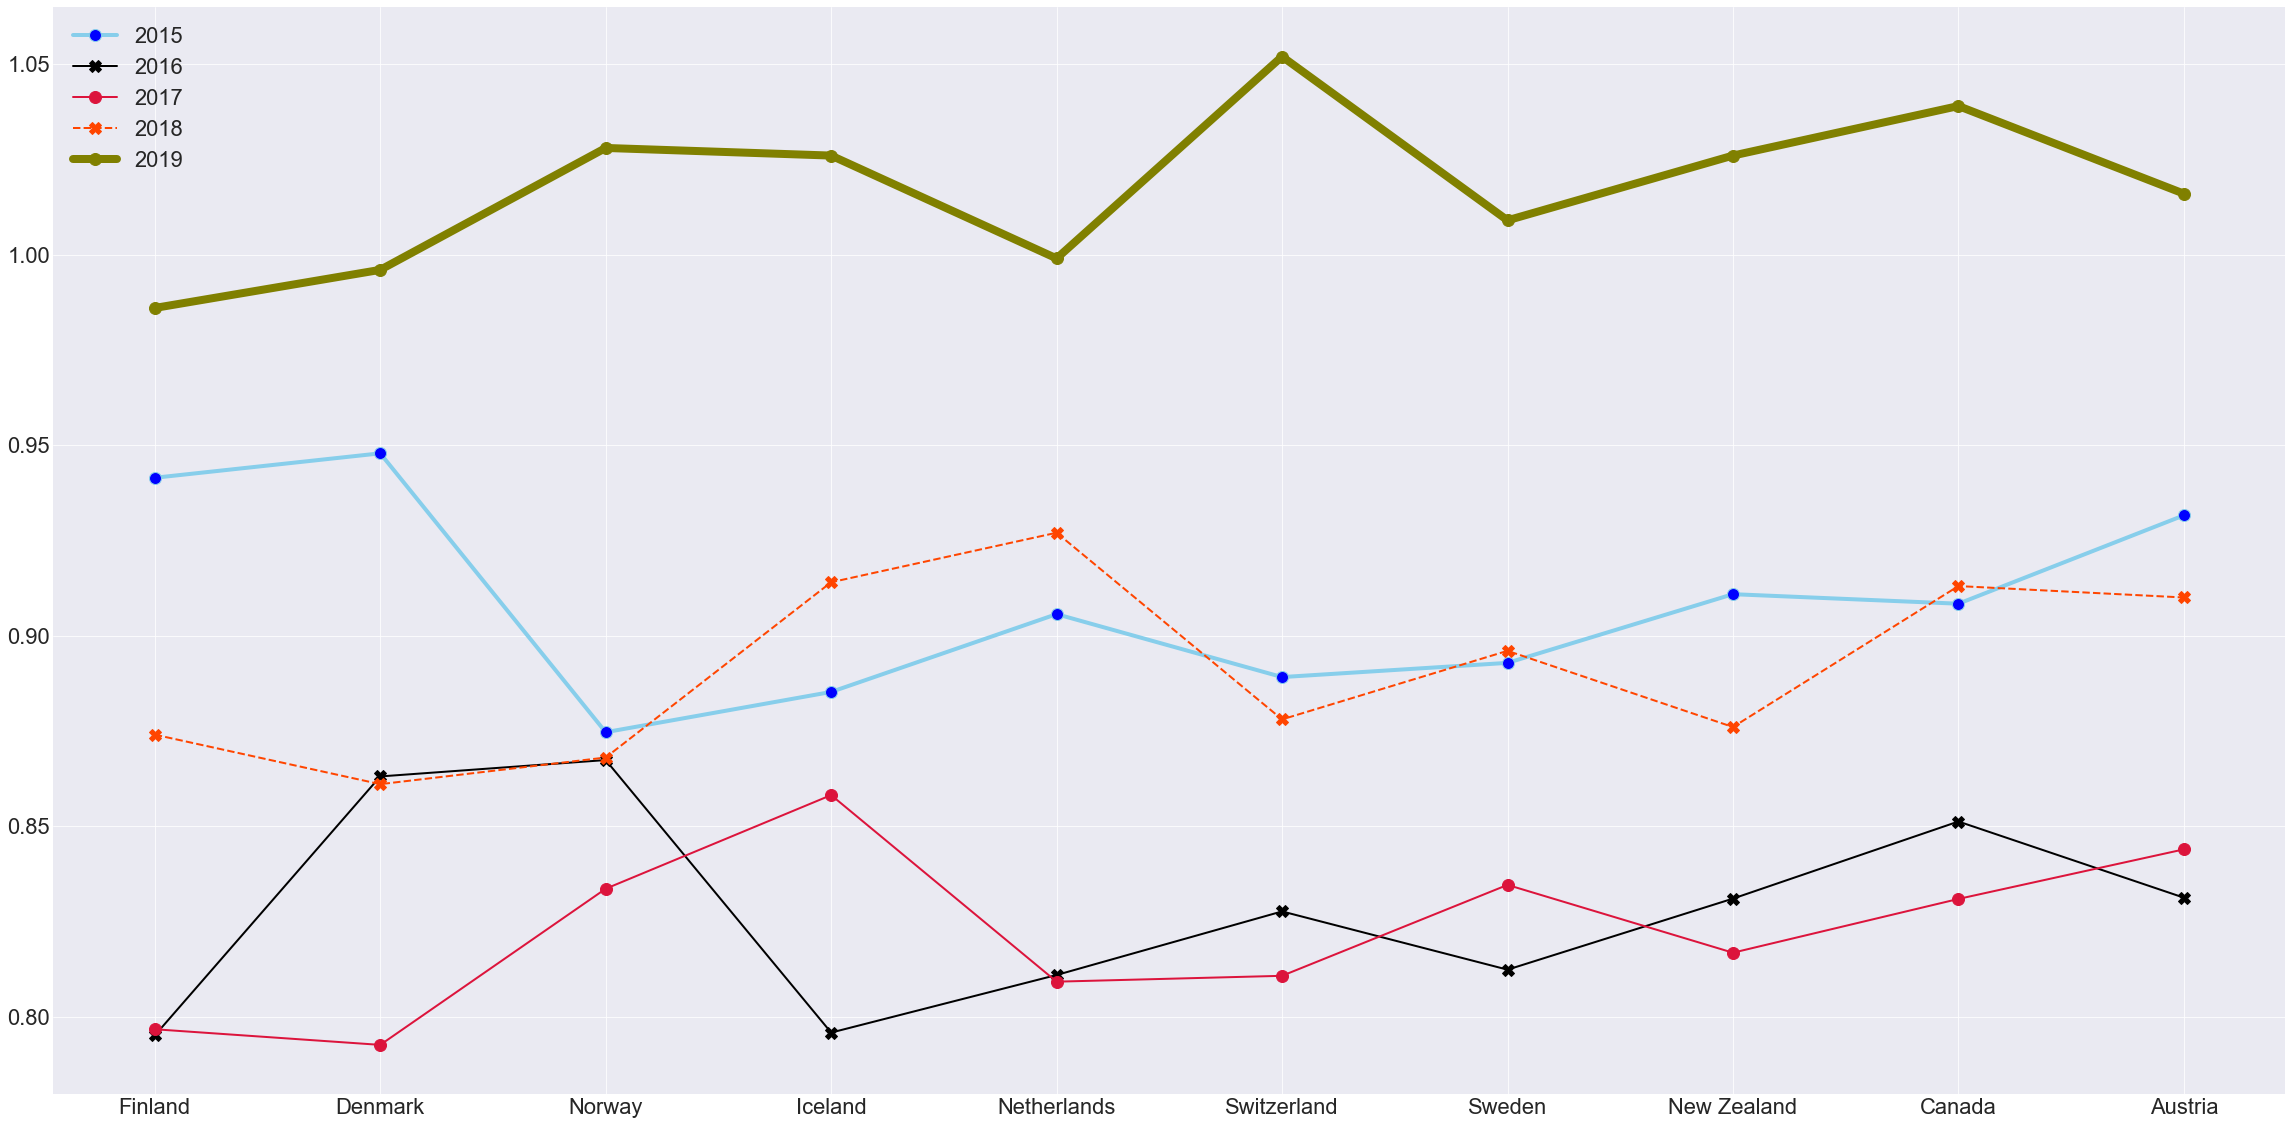

In [317]:
health_10=health.head(10)
plt.plot( 'Country', '2015', data=health_10, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Country', '2016', data=health_10, marker='X', color='black', markersize=12, linewidth=2)
plt.plot( 'Country', '2017', data=health_10, marker='o', color='crimson', markersize=12, linewidth=2, linestyle='solid', label="2017")
plt.plot( 'Country', '2018', data=health_10, marker='X', color='orangered', markersize=12, linewidth=2, linestyle='dashed', label="2018")
plt.plot( 'Country', '2019', data=health_10, marker='o', color='olive', markersize=12, linewidth=8, linestyle='solid', label="2019")
plt.legend(fontsize = 22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
fig = plt.gcf()
fig.set_size_inches(40,20)

## Life expectancy rating of least 10 happiest countries over the years

In [318]:
data_5 = [wh19_new['Country'], wh15_new['Health (Life Expectancy)'], wh16_new['Health (Life Expectancy)'], wh17_new['Health (Life Expectancy)'],
       wh18_new['Health (Life Expectancy)'], wh19_new['Health (Life Expectancy)']]
headers_1=["Country","2015","2016","2017","2018","2019"]
health = pd.concat(data_4, axis=1, keys=headers_1, join='inner')
health.tail(10)

,Country,2015,2016,2017,2018,2019
139,Zimbabwe,0.36315,0.42494,0.375223,0.248,0.433
140,Haiti,0.33861,0.04991,0.277321,0.255,0.449
141,Botswana,0.43540,0.26162,0.310081,0.417,0.538
142,Syria,0.43372,0.15781,0.163486,0.306,0.440
143,Malawi,0.29707,0.03824,0.229918,0.289,0.495
144,Yemen,0.61114,0.21297,0.194129,0.267,0.463
145,Rwanda,0.38215,0.19625,0.247106,0.539,0.614
146,Tanzania,0.46721,0.31048,0.326425,0.400,0.499
147,Afghanistan,0.06699,0.37109,0.500533,0.343,0.361
148,Central African Republic,0.15010,0.35700,0.364509,0.381,0.105


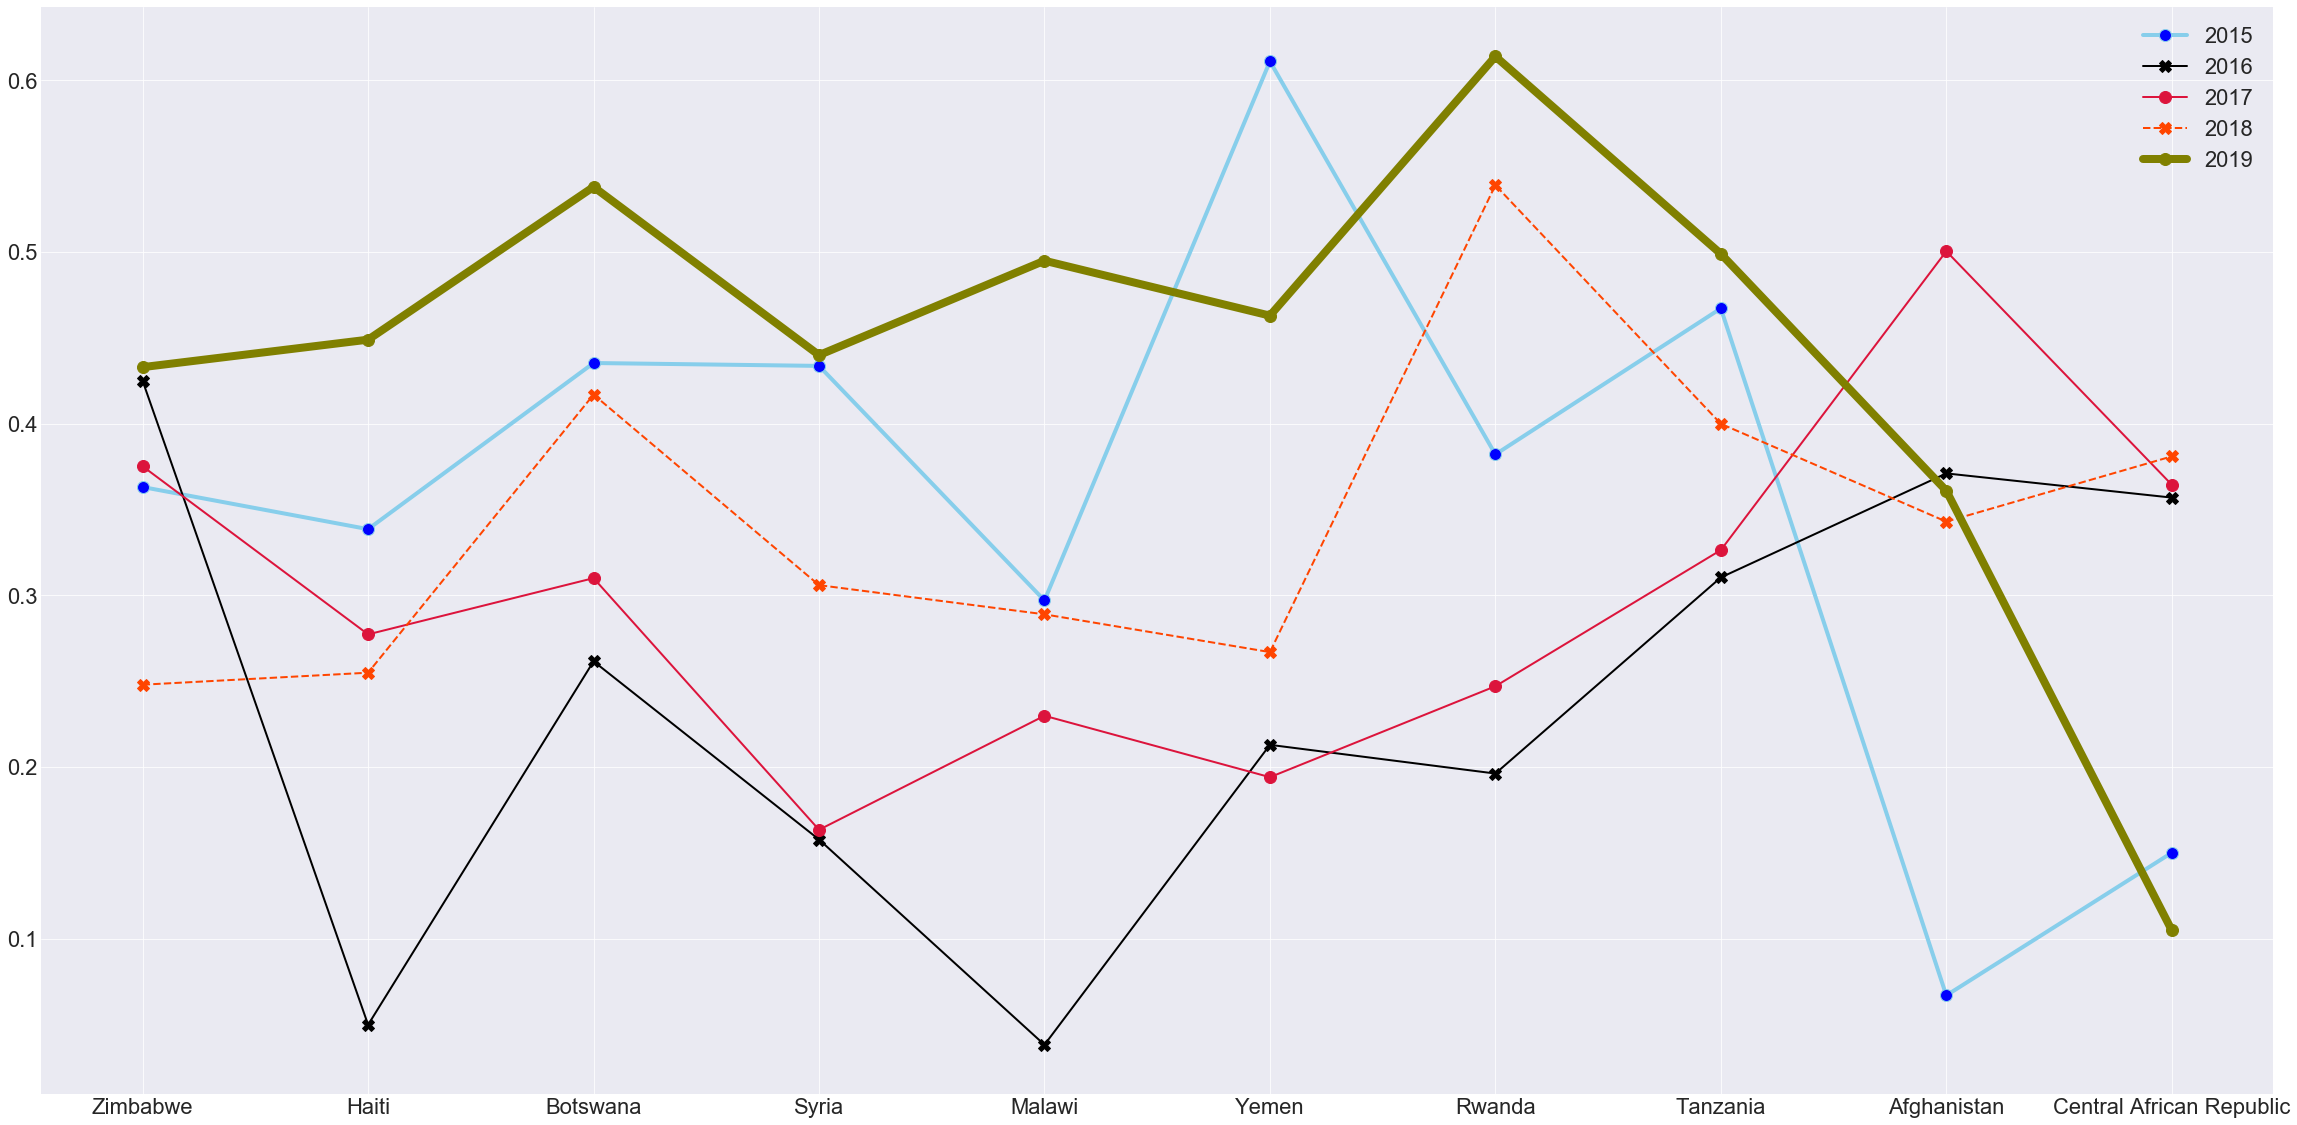

In [319]:
health_least=health.tail(10)
plt.plot( 'Country', '2015', data=health_least, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Country', '2016', data=health_least, marker='X', color='black', markersize=12, linewidth=2)
plt.plot( 'Country', '2017', data=health_least, marker='o', color='crimson', markersize=12, linewidth=2, linestyle='solid', label="2017")
plt.plot( 'Country', '2018', data=health_least, marker='X', color='orangered', markersize=12, linewidth=2, linestyle='dashed', label="2018")
plt.plot( 'Country', '2019', data=health_least, marker='o', color='olive', markersize=12, linewidth=8, linestyle='solid', label="2019")
plt.legend(fontsize = 22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
fig = plt.gcf()
fig.set_size_inches(40,20)